In [13]:
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# statsmodels.regression.linear_model.OLS

df = pd.read_csv("data/BerlinTempelhofMeanTemperature/TG_STAID002759.txt", sep=",", header = 14)


In [14]:



temp_df = pd.DataFrame(columns={'date', 'mean_temperature'})





In [15]:









temp_df['date'] = df['    DATE']
temp_df['mean_temperature'] = df['   TG']/10.0

temp_df['date'] = temp_df['date'].astype(str)


def to_date_format(x):
    final_date = x[:4] + "-" + x[4:6] + "-" + x[6:8]
    return final_date
    

temp_df['date'] = temp_df['date'].apply(to_date_format)
temp_df['date'] = pd.to_datetime(temp_df['date'])
    



# missing_dates.apply(get_previous_year_date)



In [16]:


temp_df.set_index('date')

temp_df.loc[temp_df['mean_temperature'] < -998]

,date,mean_temperature
25316,1945-04-25,-999.9
25317,1945-04-26,-999.9
25318,1945-04-27,-999.9
25319,1945-04-28,-999.9
25320,1945-04-29,-999.9
...,...,...
25506,1945-11-01,-999.9
25507,1945-11-02,-999.9
25508,1945-11-03,-999.9
25509,1945-11-04,-999.9


In [17]:



temp_df_limit = temp_df.loc[(temp_df['date'] > pd.Timestamp('1876-01-01')) & (temp_df['date'] < pd.Timestamp('2021-12-31'))]

temp_df_limit

,date,mean_temperature
1,1876-01-02,2.5
2,1876-01-03,0.3
3,1876-01-04,-5.8
4,1876-01-05,-9.8
5,1876-01-06,-7.7
...,...,...
53320,2021-12-26,-6.8
53321,2021-12-27,-3.9
53322,2021-12-28,-0.5
53323,2021-12-29,4.5


In [18]:


temp_df_limit['date'] = temp_df_limit['date'].astype('datetime64[ns]')
temp_df_limit = temp_df_limit.set_index('date')


missing_dates = pd.Series(temp_df_limit.loc[temp_df_limit['mean_temperature'] < -998].index.values)

missing_dates


/tmp/ipykernel_22773/2143567723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df_limit['date'] = temp_df_limit['date'].astype('datetime64[ns]')


0     1945-04-25
1     1945-04-26
2     1945-04-27
3     1945-04-28
4     1945-04-29
         ...    
190   1945-11-01
191   1945-11-02
192   1945-11-03
193   1945-11-04
194   1945-11-05
Length: 195, dtype: datetime64[ns]

In [19]:


def get_previous_year_date(date , years_duration, df):
    return df.loc[pd.to_datetime(date - pd.Timedelta(days=365 * years_duration))]

def get_mean_temperature(date, years, df):
    temp_mean = 0
    for year in range(1, years + 1):
        temp_mean += get_previous_year_date(date, year, df)

    for year in range(-1, -years - 1):
        temp_mean += get_previous_year_date(date, year, df)

    return temp_mean/(2 *years)


missing_temperatures = missing_dates.apply(get_mean_temperature, args=(3,temp_df_limit))


temp_df_limit.loc[temp_df_limit['mean_temperature'] < -998] = missing_temperatures.values


temp_df_limit.loc['1945-04-25':'1945-11-05']


,mean_temperature
date,
1945-04-25,4.783333
1945-04-26,4.216667
1945-04-27,4.000000
1945-04-28,3.983333
1945-04-29,3.433333
...,...
1945-11-01,3.450000
1945-11-02,3.516667
1945-11-03,2.683333


In [20]:





temp_df_limit = temp_df_limit.resample('Y').mean()

temp_df_limit





# temp_df_limit

# sns.set(rc={"figure.figsize":(15, 4)}) 
# sns.lineplot(data=temp_df_limit, y='mean_temperature', x = 'date')


,mean_temperature
date,
1876-12-31,9.339726
1877-12-31,9.727945
1878-12-31,10.236712
1879-12-31,8.180548
1880-12-31,9.805191
...,...
2017-12-31,10.712055
2018-12-31,11.755616
2019-12-31,11.824384


In [21]:
length = len(temp_df_limit)

temp_df_limit = temp_df_limit.assign(timestep=list(range(length)))

X = temp_df_limit['timestep'].values
X = sm.add_constant(X)
y = temp_df_limit['mean_temperature'].values

model = sm.OLS(y,X)
results = model.fit()

results.params

# print(y)
print(X)

# X



[[  1.   0.]
 [  1.   1.]
 [  1.   2.]
 [  1.   3.]
 [  1.   4.]
 [  1.   5.]
 [  1.   6.]
 [  1.   7.]
 [  1.   8.]
 [  1.   9.]
 [  1.  10.]
 [  1.  11.]
 [  1.  12.]
 [  1.  13.]
 [  1.  14.]
 [  1.  15.]
 [  1.  16.]
 [  1.  17.]
 [  1.  18.]
 [  1.  19.]
 [  1.  20.]
 [  1.  21.]
 [  1.  22.]
 [  1.  23.]
 [  1.  24.]
 [  1.  25.]
 [  1.  26.]
 [  1.  27.]
 [  1.  28.]
 [  1.  29.]
 [  1.  30.]
 [  1.  31.]
 [  1.  32.]
 [  1.  33.]
 [  1.  34.]
 [  1.  35.]
 [  1.  36.]
 [  1.  37.]
 [  1.  38.]
 [  1.  39.]
 [  1.  40.]
 [  1.  41.]
 [  1.  42.]
 [  1.  43.]
 [  1.  44.]
 [  1.  45.]
 [  1.  46.]
 [  1.  47.]
 [  1.  48.]
 [  1.  49.]
 [  1.  50.]
 [  1.  51.]
 [  1.  52.]
 [  1.  53.]
 [  1.  54.]
 [  1.  55.]
 [  1.  56.]
 [  1.  57.]
 [  1.  58.]
 [  1.  59.]
 [  1.  60.]
 [  1.  61.]
 [  1.  62.]
 [  1.  63.]
 [  1.  64.]
 [  1.  65.]
 [  1.  66.]
 [  1.  67.]
 [  1.  68.]
 [  1.  69.]
 [  1.  70.]
 [  1.  71.]
 [  1.  72.]
 [  1.  73.]
 [  1.  74.]
 [  1.  75.]
 [  1.  76.]

In [22]:
slopes = np.full((len(X),2), [results.params[0], results.params[1]])
# constants = np.full(len(X), results.params[0])KC
slopes


array([[8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.51659059, 0.01204636],
       [8.

In [23]:

y_plot = np.sum(X*slopes, axis=1)
y_plot



array([ 8.51659059,  8.52863695,  8.54068331,  8.55272967,  8.56477603,
        8.57682239,  8.58886875,  8.60091512,  8.61296148,  8.62500784,
        8.6370542 ,  8.64910056,  8.66114692,  8.67319328,  8.68523964,
        8.697286  ,  8.70933236,  8.72137872,  8.73342508,  8.74547145,
        8.75751781,  8.76956417,  8.78161053,  8.79365689,  8.80570325,
        8.81774961,  8.82979597,  8.84184233,  8.85388869,  8.86593505,
        8.87798142,  8.89002778,  8.90207414,  8.9141205 ,  8.92616686,
        8.93821322,  8.95025958,  8.96230594,  8.9743523 ,  8.98639866,
        8.99844502,  9.01049138,  9.02253775,  9.03458411,  9.04663047,
        9.05867683,  9.07072319,  9.08276955,  9.09481591,  9.10686227,
        9.11890863,  9.13095499,  9.14300135,  9.15504772,  9.16709408,
        9.17914044,  9.1911868 ,  9.20323316,  9.21527952,  9.22732588,
        9.23937224,  9.2514186 ,  9.26346496,  9.27551132,  9.28755769,
        9.29960405,  9.31165041,  9.32369677,  9.33574313,  9.34

<AxesSubplot:xlabel='date', ylabel='mean_temperature'>

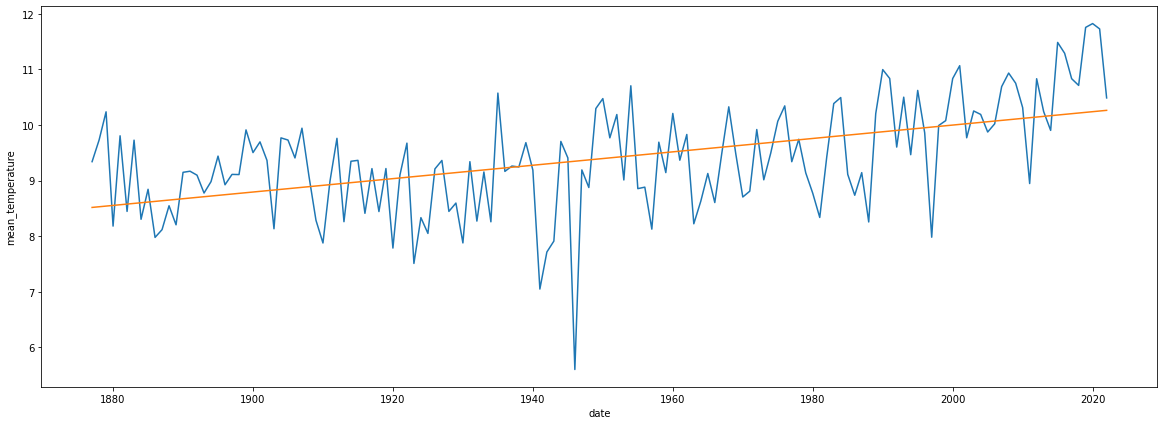

In [24]:

fig, ax = plt.subplots(figsize=(20,7))
sns.lineplot(data=temp_df_limit, y='mean_temperature', x='date', ax=ax)
sns.lineplot(y=y_plot, x=temp_df_limit.index, ax=ax)
